# Chapter 3. 분류

---
## 3.1 MNIST

In [57]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

C:\Users\link\Anaconda3\envs\mlbook\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\link\Anaconda3\envs\mlbook\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

◈ 사이킷런에서 읽어 들인 데이터셋들은 일반적으로 비슷한 딕셔너리 구조를 가짐
+ 데이터셋을 설명하는 DESCR 키
+ 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키
+ 레이블 배열을 담고 있는 target 키

In [58]:
X, y = mnist["data"], mnist["target"]
print(type(mnist))
print(mnist.keys())
print(type(X), type(X))
print(X.shape,y.shape)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'COL_NAMES', 'target', 'DESCR'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(70000, 784) (70000,)


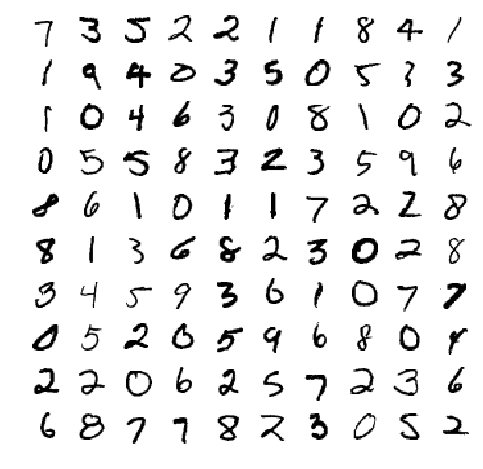

array([[7, 3, 5, 2, 2, 1, 1, 8, 4, 1],
       [1, 9, 4, 0, 3, 5, 0, 5, 3, 3],
       [1, 0, 4, 6, 3, 0, 8, 1, 0, 2],
       [0, 5, 5, 8, 3, 2, 3, 5, 9, 6],
       [8, 6, 1, 0, 1, 1, 7, 2, 2, 8],
       [8, 1, 3, 6, 8, 2, 3, 0, 2, 8],
       [3, 4, 5, 9, 3, 6, 1, 0, 7, 7],
       [0, 5, 2, 0, 5, 9, 6, 8, 0, 4],
       [2, 2, 0, 6, 2, 5, 7, 2, 3, 6],
       [6, 8, 7, 7, 8, 2, 3, 0, 5, 2]])

In [59]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

target = []
plt.figure(figsize=(8,8))

for i in range(100):
    num = random.randrange(0, 70000)
    target.append(int(y[num]))

    some_digit = X[num]
    some_digit_image = some_digit.reshape(28, 28)
    
    plt.subplot(10,10,i+1)
    plt.imshow(some_digit_image,
               cmap = matplotlib.cm.binary,
               # cmap = matplotlib.cm.Blues,
               interpolation="nearest",)
    plt.axis("off")
plt.show()

target = np.array(target)
target = target.reshape(-1, 10)
target

**※ interpolation** 매개변수  
https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html

---
+ MNIST 데이터셋은 이미 훈련 세트(앞쪽 60,000개 이미지)와 테스트 세트(뒤쪽 10,000개 이미지)로 나누어 놓음

In [60]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

---
+ 훈련 세트를 섞어서 모든 교차 검증 폴드가 비슷해지도록 만듦 (하나의 폴드라도 특정 숫자가 누락되면 안 됨)
+ 어떤 학습 알고리즘은 훈련 샘플의 순서에 민감해서 많은 비슷한 샘플이 연이어 나타나면 성능이 나빠짐

In [61]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [62]:
np.random.permutation(10)

array([4, 7, 8, 0, 5, 3, 9, 6, 1, 2])

---
## 3.2 이진 분류기 훈련

+ **이진 분류기**<sup>binary classifier</sup> (간단한 5-감지기) 타깃 벡터

In [63]:
y_train_5 = (y_train == 5) # 5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == 5)

◈ **확률적 경사 하강법**<sup>Stochastic Gradient Descent</sup>(SGD) 분류기
+ 매우 큰 데이터셋을 효율적으로 처리 (한 번에 하나씩 훈련 샘플을 독립적으로 처리하기 때문)
+ **온라인 학습**에 잘 들어맞음

In [64]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
some_digit_1, some_digit_2 = X[36000], X[44000]
print(y[36000], y[44000])

5.0 7.0


In [66]:
sgd_clf.predict([some_digit_1, some_digit_2])

array([ True, False])

---
## 3.3 성능 측정

### 3.3.1 교차 검증을 사용한 정확도 측정

◈ K-겹 교차 검증

In [67]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9611, 0.9344, 0.9579])

---
◈ 교차 검증 기능을 직접 구현
+ 가끔 사이킷런이 제공하는 기능보다 교차 검증 과정을 더 많이 제어해야 할 필요가 있음
+ cross_val_score() 함수와 거의 같은 작업을 수행하고 동일한 결과를 출력

In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    # print(y_test_fold)
    # print(train_index)

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9611
0.9344
0.9579


**※ StratifiedKFold** 클래스  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

---
◈ 모든 이미지를 무조건 5가 아니라고 예측하는 더미 분류기

In [69]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9104 , 0.90615, 0.9124 ])

In [70]:
np.zeros((3, 1), dtype=bool)

array([[False],
       [False],
       [False]])

+ 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여줌
+ 특히 **불균형한 데이터셋**을 다룰 때 더욱 선호되지 않음(어떤 클래스가 다른 것보다 월등히 많은 경우)

### 3.3.2 오차 행렬<sup>confusion matrix</sup>

+ e.g. 숫자 5의 이미지를 3으로 잘못 분류한 횟수 → 오차 행렬의 5행 3열

In [71]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print(y_train_pred, y_train_pred.shape)

[False False False ... False False False] (60000,)


In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52559,  2020],
       [  912,  4509]], dtype=int64)

+ 행 : **실제 클래스** , 열 : **예측한 클래스**
+ 첫 번째 행 : '5 아님'(**음성 클래스**<sup>negative class</sup>)
    + 54,104개를 '5 아님'으로 정확하게 분류 → **진짜 음성**<sup>true negative</sup>
    + 나머지 475개는 '5'라고 잘못 분류 → **거짓 양성**<sup>false positive</sup>
+ 두 번째 행 : '5'이미지(**양성 클래스**<sup>positive class</sup>)
    + 1,966개를 '5 아님'으로 잘못 분류 → **거짓 음성**<sup>false negative</sup>
    + 나머지 3,455개는 '5'라고 정확하게 분류 → **진짜 양성**<sup>true positive</sup>

In [73]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

---
◈ **정밀도**<sup>precidion</sup> : 양성 예측의 정확도
![Equation3-1](./images/Equation3-1.png)
**<center>식 3-1 정밀도</center>**
+ TP : 진짜 양성의 수 , FP : 거짓 양성의 수

◈ **재현율**<sup>recall</sup>=**민감도**<sup>sensitivity</sup>=**진짜 양성 비율**<sup>true positive rate</sup>(TPR) : 분류기가 정확하게 감지한 양성 샘플의 비율
![Equation3-2](./images/Equation3-2.png)
**<center>식 3-2 재현율</center>**
+ FN : 거짓 음성의 수

---
![Figure3-2](./images/Figure3-2.png)
**<center>그림 3-2 오차 행렬</center>**

### 3.3.3 정밀도와 재현율

In [79]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

(0.6906111196201562, 0.831765356945213)

+ 5로 판별된 이미지 중 69%만 정확
+ 전체 숫자 5에서 83%만 감지

---
◈ **F<sub>1</sub> score** : 정밀도와 재현율의 **조화 평균**<sup>harmonic mean</sup>
+ 정밀도와 재현율을 하나의 숫자로 만들어 두 분류기를 비교할 때 편리함
![Equation3-3](./images/Equation3-3.png)
**<center>식 3-3 F<sub>1</sub> 점수</center>**

In [80]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7546443514644351

+ 정밀도와 재현율이 비슷한 분류기에서는 F<sub>1</sub> 점수가 높음
+ 상황에 따라 정밀도가 중요할 수도 있고 재현율이 중요할 수도 있음
    + 안전한 동영상 걸러내기 → 재현율이 낮더라도 높은 정밀도가 필요
    + 감시 카메라 → 정밀도가 낮더라도 높은 재현율이 필요

▣ 정밀도를 올리면 재현율이 줄고 그 반대도 마찬가지 → **정밀도/재현율 트레이드오프**

### 3.3.4 정밀도/재현율 트레이드오프

+ SGDClassifier는 **결정 함수**<sup>decision function</sup>를 사용하여 각 샘플의 점수를 계산함
+ 이 점수가 임곗값보다 크면 샘플을 양성 클래스에 할당하고 그렇지 않으면 음성 클래스에 할당함

![Figure3-3](./images/Figure3-3.png)
**<center>그림 3-3 결정 임곗값과 정밀도/재현율 트레이드오프</center>**

In [186]:
some_digit = X[34887]
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([14833.02796721])

In [187]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [188]:
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [273]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                             cv=3, method="decision_function")
y_scores, y_scores.shape

(array([-125178.57694668, -595065.79031589, -251025.86971927, ...,
        -161936.93412015, -371781.11244939, -664854.75958195]), (60000,))

In [274]:
(y_train_pred == (y_scores > 0)).all()

True

In [201]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
precisions.shape, recalls.shape, thresholds.shape

((59848,), (59848,), (59847,))

+ 가능한 모든 임곗값에 대해 정밀도와 재현율을 계산

---
◈ **결정 임곗값에 대한 정밀도와 재현율**

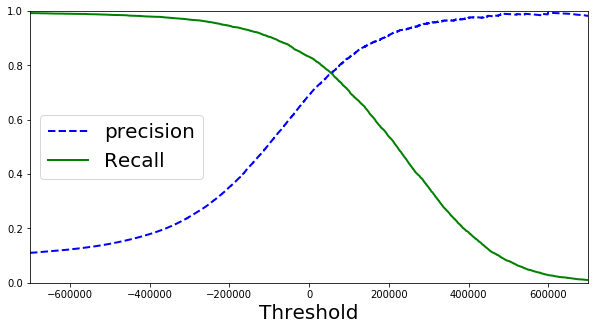

In [244]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=20)
    plt.legend(loc="center left", fontsize=20)
    plt.xlim([-700000, 700000])
    plt.ylim([0, 1])
    
plt.figure(figsize=(10, 5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

---
◈ **재현율에 대한 정밀도(PR 곡선)**

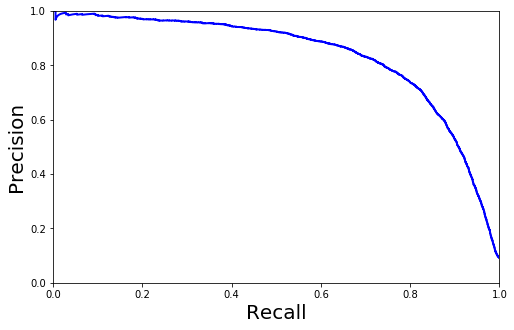

In [268]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=20)
    plt.ylabel("Precision", fontsize=20)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 5))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [275]:
y_train_pred_70000 = (y_scores > 70000)
precision_score(y_train_5, y_train_pred_70000), recall_score(y_train_5, y_train_pred_70000)

(0.7897087378640777, 0.7502305847629589)

### 3.3.5 ROC 곡선

◈ **수신기 조작 특성**<sup>receiver operating characteristic</sup>(ROC) 곡선
+ 이진 분류에서 널리 사용
+ **거짓 양성 비율**<sup>false positive rate</sup>(FPR)에 대한 **진짜 양성 비율**<sup>true positive rate</sup>(TPR, 재현율의 다른 이름)의 곡선  
※ **FPR**<sup>false positive rate</sup> : 양성으로 잘못 분류된 음성 샘플의 비율  
※ **TNR**<sup>true negative rate</sup> : 음성으로 정확하게 분류한 음성 샘플의 비율(=**특이도**<sup>specificity</sup>)  
※ **FPR = 1 - TNR**
+ 따라서 ROC 곡선은 **민감도**(재현율)에 대한 **1 - 특이도** 그래프

In [277]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

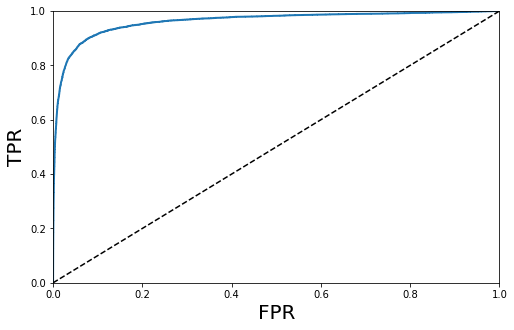

In [288]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=20)
    plt.ylabel('TPR', fontsize=20)

plt.figure(figsize=(8, 5))
plot_roc_curve(fpr, tpr)
plt.show()

+ 검은색 점선은 완전한 랜덤 분류기의 ROC 곡선을 뜻함
+ 좋은 분류기는 이 점선으로부터 최대한 멀리 떨어져 있어야 함(왼쪽 위 모서리)

◈ **곡선 아래의 면적**<sup>area under the curve</sup>(AUC)
+ 완벽한 분류기는 ROC의 AUC가 1
+ 완전한 랜덤 분류기는 ROC의 AUC가 0.5

In [289]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9619756139834423

+ 일반적으로 양성 클래스가 드물거나 거짓 음성보다 거짓 양성이 더 중요할 때 PR 곡선을 사용하고 그렇지 않으면 ROC 곡선을 사용

In [362]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                   cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]  # 양성 클래스에 대한 확률을 점수로 사용
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [363]:
y_probas_forest.shape

(60000, 2)

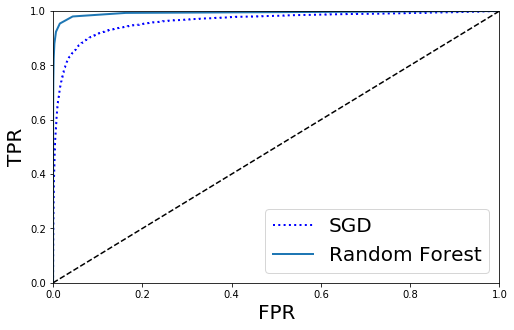

In [364]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=20)
plt.show()

In [365]:
roc_auc_score(y_train_5, y_scores), roc_auc_score(y_train_5, y_scores_forest)

(0.9619756139834423, 0.9930032118975847)

In [366]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
y_train_pred_forest, y_train_pred_forest.shape

(array([False, False, False, ..., False, False, False]), (60000,))

In [367]:
precision_score(y_train_5, y_train_pred_forest), recall_score(y_train_5, y_train_pred_forest)

(0.983274647887324, 0.8242021767201624)